<a href="https://colab.research.google.com/github/Hamdan070905/Week1-StudentPerformance-EDA-/blob/main/NSP_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn


 Dataset Loaded Successfully

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column

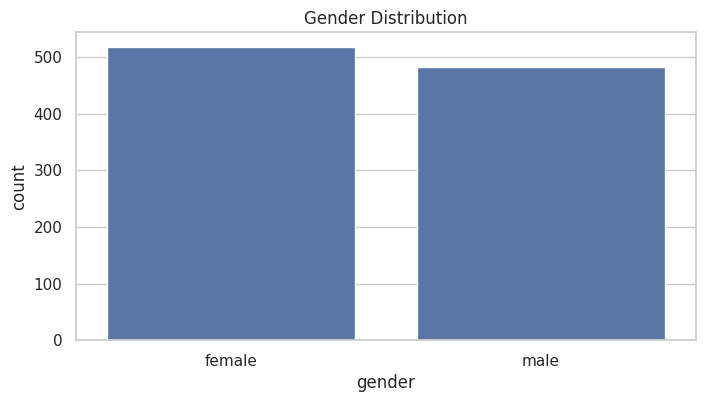

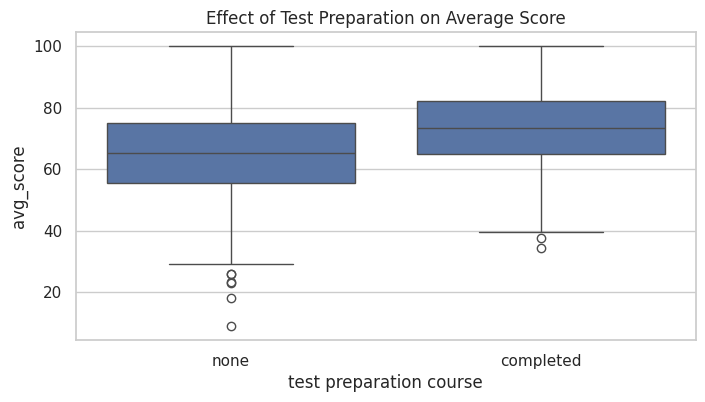

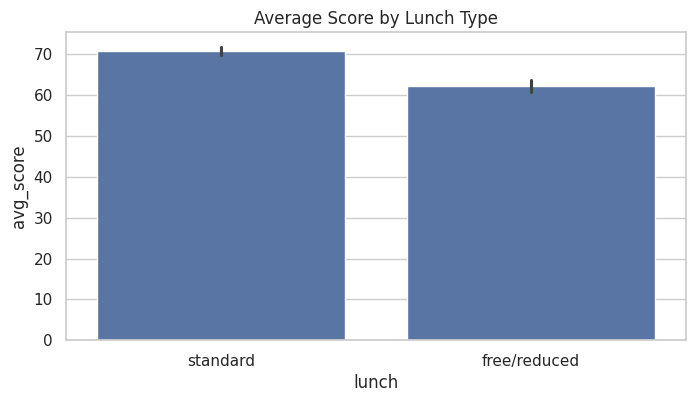

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

df = pd.read_csv("StudentsPerformance.csv")
print(" Dataset Loaded Successfully\n")
print(df.head())

print("\nData Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

df['total_score'] = df[['math score','reading score','writing score']].sum(axis=1)
df['avg_score'] = df['total_score']/3
df['pass_fail'] = (df['avg_score'] >= 50).astype(int)


print("\nAverage Scores by Gender:\n", df.groupby('gender')[['math score','reading score','writing score']].mean())
print("\nAverage Scores by Lunch Type:\n", df.groupby('lunch')[['math score','reading score','writing score']].mean())
print("\nAverage Scores by Test Preparation:\n", df.groupby('test preparation course')[['math score','reading score','writing score']].mean())
print("\nAverage Scores by parental level of education:\n", df.groupby('parental level of education')[['math score','reading score','writing score']].mean())

sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='test preparation course', y='avg_score', data=df)
plt.title("Effect of Test Preparation on Average Score")
plt.show()


plt.figure(figsize=(8,4))
sns.barplot(x='lunch', y='avg_score', data=df)
plt.title("Average Score by Lunch Type")
plt.show()